In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy import stats
import folium as folium
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx





### Lectura del archivo Washington.json

In [27]:
df= pd.read_json("Washington.json",lines=True)

In [28]:
df.head()

,user_id,name,time,rating,text,gmap_id,fecha
0,1.148520e+20,Joshua McCormack,1476746560454,5,I feel like not a lot of people know about thi...,0x5490143a1a6be1a3:0xcdfc8b297798e8f2,17/10/2016
1,1.055213e+20,J V,1413911526424,5,"It's a dive bar with great service, Do not exp...",0x5490143a1a6be1a3:0xcdfc8b297798e8f2,21/10/2014
2,1.126502e+20,Naomi Ishikawa,1325365056929,4,"Service is good. Food's alright, but...BUT......",0x5490143a1a6be1a3:0xcdfc8b297798e8f2,31/12/2011
3,1.027241e+20,Edward Hilgendorf,1479180008850,3,"Extremely divey, decent food with crazy select...",0x5490143a1a6be1a3:0xcdfc8b297798e8f2,15/11/2016
4,1.088590e+20,Christina,1480490310116,5,This is hands down the best dive bar in Seattl...,0x5490143a1a6be1a3:0xcdfc8b297798e8f2,30/11/2016


### Lectura del archivo "df_gastronomico_ciudades.json "

In [29]:
df2=pd.read_json(r"df_gastronomico_ciudades.json",lines=True)

In [30]:
df2.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,url,estadio_mas_cercano
0,Creole Orleans Catering & Food Truck,"Creole Orleans Catering & Food Truck, 2841 Gre...",0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"['Creole restaurant', 'Caribbean restaurant', ...",4.7,31,https://www.google.com/maps/place//data=!4m2!3...,Mercedes-Benz Stadium
1,Biswas Grocery and Cafe,"Biswas Grocery and Cafe, 2853 Buford Hwy NE, A...",0x88f507f3e1cde31d:0x1bcd2bb2f0555399,33.831454,-84.341647,"['Organic food store', 'Convenience store', 'P...",4.7,25,https://www.google.com/maps/place//data=!4m2!3...,Mercedes-Benz Stadium
2,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",0x88f5047831dfc86d:0x985e3a6645f5ca4f,33.760404,-84.386319,"['Thai restaurant', 'Restaurant']",4.2,35,https://www.google.com/maps/place//data=!4m2!3...,Mercedes-Benz Stadium
3,Waffle House,"Waffle House, 96 Upper Alabama St, Atlanta, GA...",0x88f503840040687f:0xd2152396faf21f2e,33.751822,-84.390075,"['Restaurant', 'American restaurant', 'Breakfa...",2.2,26,https://www.google.com/maps/place//data=!4m2!3...,Mercedes-Benz Stadium
4,The Atlas Tavern,"The Atlas Tavern, St. Regis Atlanta, 88 West P...",0x88f5058eee201ca7:0xe6bc72cd7f3d87d0,33.839848,-84.382633,"['Gastropub', 'Cocktail bar', 'New American re...",4.8,8,https://www.google.com/maps/place//data=!4m2!3...,Mercedes-Benz Stadium


### Informacion General

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47761 entries, 0 to 47760
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  47761 non-null  float64
 1   name     47761 non-null  object 
 2   time     47761 non-null  int64  
 3   rating   47761 non-null  int64  
 4   text     26883 non-null  object 
 5   gmap_id  47761 non-null  object 
 6   fecha    47761 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.6+ MB
None


In [8]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nombre_local              18037 non-null  object 
 1   direccion                 18037 non-null  object 
 2   ciudad                    18037 non-null  object 
 3   codigo_postal_cod_ciudad  18037 non-null  object 
 4   codigo_ciudad             18037 non-null  object 
 5   codigo_postal             18037 non-null  object 
 6   gmap_id                   18037 non-null  object 
 7   latitude                  18037 non-null  float64
 8   longitude                 18037 non-null  float64
 9   category                  18037 non-null  object 
 10  avg_rating                18037 non-null  float64
 11  num_of_reviews            18037 non-null  int64  
 12  price                     8690 non-null   object 
 13  MISC                      17614 non-null  object 
dtypes: flo

### Descripción de los dataframe

In [9]:
df['rating'].describe()


count    47761.000000
mean         4.293042
std          1.024905
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [10]:
df2.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,18037.000000,18037.000000,18037.000000,18037.000000
mean,38.290007,-92.404179,4.137573,70.622276
std,4.948144,18.621202,0.575608,143.090909
min,25.993710,-122.805295,1.000000,1.000000
25%,34.055071,-118.186637,3.900000,17.000000
50%,39.943207,-86.808270,4.200000,38.000000
75%,40.831310,-74.145373,4.500000,78.000000
max,47.682747,-71.145040,5.000000,5321.000000


### Análisis de Datos Nulos

In [11]:
print(df.isnull().sum())


user_id        0
name           0
time           0
rating         0
text       20878
gmap_id        0
fecha          0
dtype: int64


In [12]:
print(df2.isnull().sum())


nombre_local                   0
direccion                      0
ciudad                         0
codigo_postal_cod_ciudad       0
codigo_ciudad                  0
codigo_postal                  0
gmap_id                        0
latitude                       0
longitude                      0
category                       0
avg_rating                     0
num_of_reviews                 0
price                       9347
MISC                         423
dtype: int64


### Outliers

Outliers en la columna 'rating' usando IQR:
8        1
11       1
13       2
25       1
28       1
        ..
47636    1
47637    2
47645    2
47757    2
47760    1
Name: rating, Length: 3333, dtype: int64
Outliers en la columna 'rating' usando Z-score:
8        1
11       1
25       1
28       1
39       1
        ..
47576    1
47584    1
47621    1
47636    1
47760    1
Name: rating, Length: 1732, dtype: int64


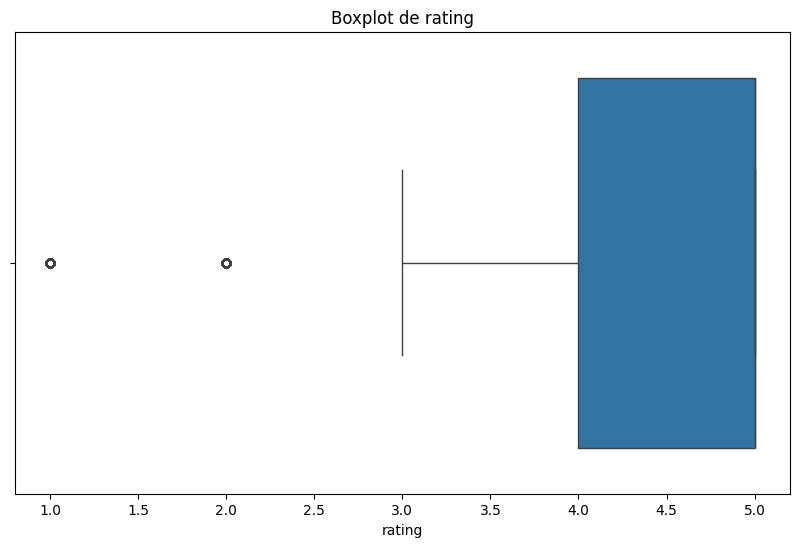

In [13]:
rating = df['rating']

# Calcular el IQR para la columna 'rating'
Q1 = rating.quantile(0.25)
Q3 = rating.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando IQR
outliers_iqr = rating[(rating < (Q1 - 1.5 * IQR)) | (rating > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'rating' usando IQR:")
print(outliers_iqr)

# Calcular Z-score para la columna 'rating'
z_scores = stats.zscore(rating)
abs_z_scores = abs(z_scores)

# Identificar outliers con Z-score mayor que 3
outliers_z = rating[abs_z_scores > 3]
print("Outliers en la columna 'rating' usando Z-score:")
print(outliers_z)

# Graficar el boxplot para 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(x=rating)
plt.title('Boxplot de rating')
plt.show()


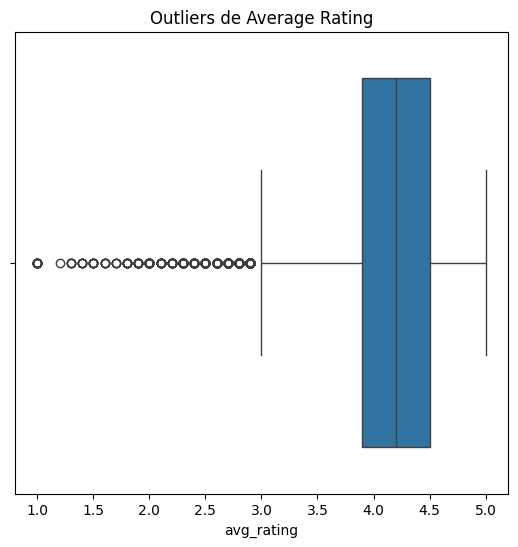

In [14]:


columns_to_check = ['avg_rating']

Q1 = df2[columns_to_check].quantile(0.25)
Q3 = df2[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df2[(df2[columns_to_check] < (Q1 - 1.5 * IQR)) | (df2[columns_to_check] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['avg_rating'])
plt.title('Outliers de Average Rating')



plt.show()



Outliers en la columna 'num_of_reviews' usando IQR:
124      798
206      178
217      496
224      214
229      768
        ... 
18019    238
18024    244
18027    292
18029    178
18031    238
Name: num_of_reviews, Length: 1371, dtype: int64
Outliers en la columna 'num_of_reviews' usando Z-score:
124       798
229       768
233      1018
237      3128
238      1373
         ... 
17884     798
17890    1108
17892    1208
17893    1351
17901     624
Name: num_of_reviews, Length: 171, dtype: int64


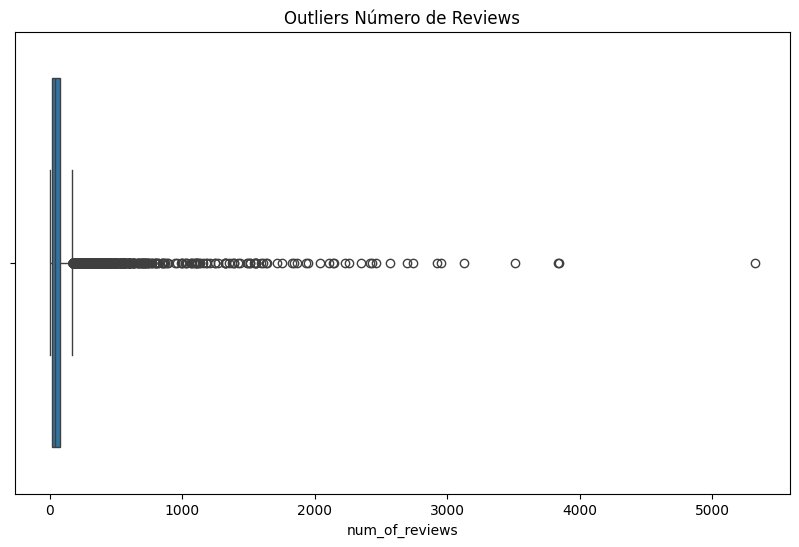

In [15]:

num_of_reviews = df2['num_of_reviews']

Q1 = num_of_reviews.quantile(0.25)
Q3 = num_of_reviews.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = num_of_reviews[(num_of_reviews < (Q1 - 1.5 * IQR)) | (num_of_reviews > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'num_of_reviews' usando IQR:")
print(outliers_iqr)

z_scores = stats.zscore(num_of_reviews)
abs_z_scores = abs(z_scores)

outliers_z = num_of_reviews[abs_z_scores > 3]
print("Outliers en la columna 'num_of_reviews' usando Z-score:")
print(outliers_z)

plt.figure(figsize=(10, 6))
sns.boxplot(x=num_of_reviews)
plt.title('Outliers Número de Reviews')
plt.show()


### Histogramas de distribución

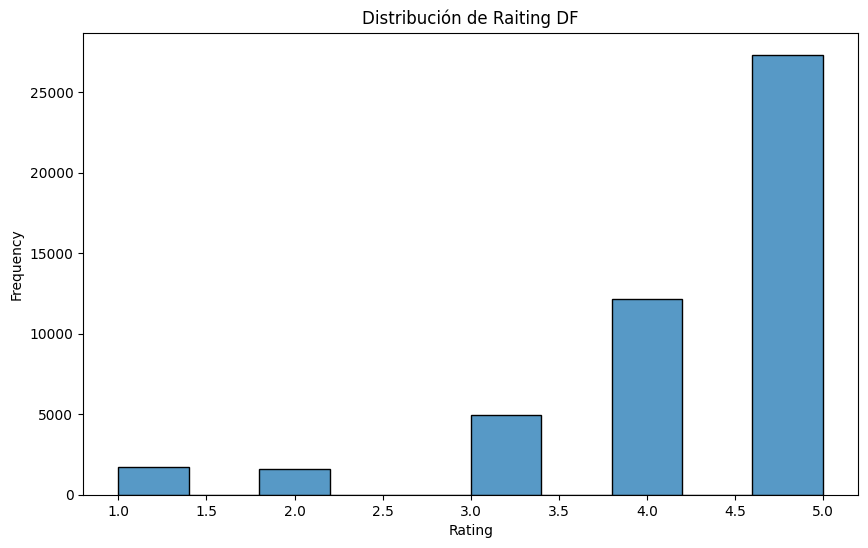

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=10)
plt.title('Distribución de Raiting DF')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


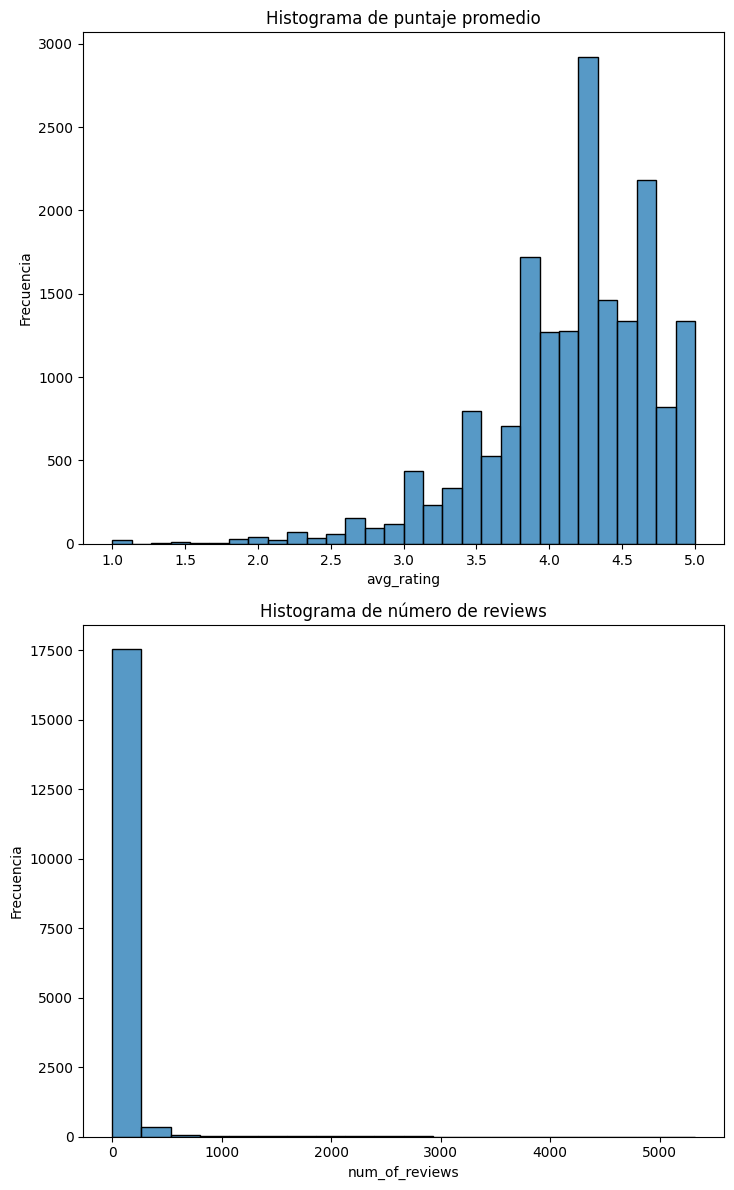

In [17]:
avg_rating = df2['avg_rating']
num_of_reviews = df2['num_of_reviews']

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.histplot(avg_rating, bins=30, kde=False)
plt.title('Histograma de puntaje promedio')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.histplot(num_of_reviews, bins=20, kde=False)
plt.title('Histograma de número de reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Análisis de sentimientos 

In [18]:
df['text'] = df['text'].fillna('')


In [19]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['review_sentiment'] = df['text'].apply(get_sentiment)

print(df[['text', 'review_sentiment']].head())


                                                text  review_sentiment
0  I feel like not a lot of people know about thi...          0.354762
1  It's a dive bar with great service, Do not exp...          0.866667
2  Service is good.  Food's alright, but...BUT......          0.362500
3  Extremely divey, decent food with crazy select...         -0.039872
4  This is hands down the best dive bar in Seattl...          0.448148


Text(0, 0.5, 'Frecuencia')

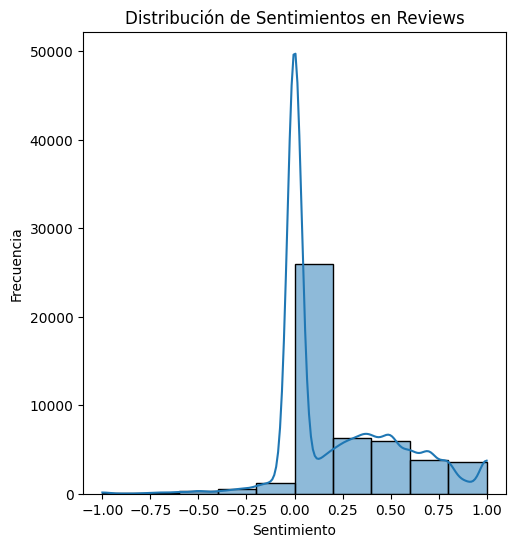

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['review_sentiment'], bins=10, kde=True)
plt.title('Distribución de Sentimientos en Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')


### Unión de datasets

In [21]:
merged_df = pd.merge(df, df2, on='gmap_id', how='inner')


In [22]:
merged_df

,user_id,name,time,rating,text,gmap_id,fecha,review_sentiment,nombre_local,direccion,...,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,1.148520e+20,Joshua McCormack,1476746560454,5,I feel like not a lot of people know about thi...,0x5490143a1a6be1a3:0xcdfc8b297798e8f2,17/10/2016,0.354762,Ed's Kort Haus,6732 Greenwood Ave N,...,WA 98103,WA,98103,47.678611,-122.355000,[Hamburger restaurant],4.0,14,None,"{'Service options': ['Delivery'], 'Highlights'..."
1,1.148520e+20,Joshua McCormack,1476746560454,5,I feel like not a lot of people know about thi...,0x5490143a1a6be1a3:0xcdfc8b297798e8f2,17/10/2016,0.354762,Ed's Kort Haus,6732 Greenwood Ave N,...,WA 98103,WA,98103,47.678611,-122.355000,[Hamburger restaurant],4.0,14,None,"{'Service options': ['Delivery'], 'Highlights'..."
2,1.055213e+20,J V,1413911526424,5,"It's a dive bar with great service, Do not exp...",0x5490143a1a6be1a3:0xcdfc8b297798e8f2,21/10/2014,0.866667,Ed's Kort Haus,6732 Greenwood Ave N,...,WA 98103,WA,98103,47.678611,-122.355000,[Hamburger restaurant],4.0,14,None,"{'Service options': ['Delivery'], 'Highlights'..."
3,1.055213e+20,J V,1413911526424,5,"It's a dive bar with great service, Do not exp...",0x5490143a1a6be1a3:0xcdfc8b297798e8f2,21/10/2014,0.866667,Ed's Kort Haus,6732 Greenwood Ave N,...,WA 98103,WA,98103,47.678611,-122.355000,[Hamburger restaurant],4.0,14,None,"{'Service options': ['Delivery'], 'Highlights'..."
4,1.126502e+20,Naomi Ishikawa,1325365056929,4,"Service is good. Food's alright, but...BUT......",0x5490143a1a6be1a3:0xcdfc8b297798e8f2,31/12/2011,0.362500,Ed's Kort Haus,6732 Greenwood Ave N,...,WA 98103,WA,98103,47.678611,-122.355000,[Hamburger restaurant],4.0,14,None,"{'Service options': ['Delivery'], 'Highlights'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22895,1.101518e+20,Pascal Bonjour,1560886097825,5,,0x5490152737e8e8ad:0xb31731a334f45a63,18/06/2019,0.000000,Zeeks Pizza,1830 E Mercer St,...,WA 98112,WA,98112,47.624535,-122.307531,"[Pizza restaurant, Beer hall, Family restauran...",4.5,98,$$,"{'Service options': ['Outdoor seating', 'Curbs..."
22896,1.173750e+20,Robert Palmer,1615847919391,2,,0x5490152737e8e8ad:0xb31731a334f45a63,15/03/2021,0.000000,Zeeks Pizza,1830 E Mercer St,...,WA 98112,WA,98112,47.624535,-122.307531,"[Pizza restaurant, Beer hall, Family restauran...",4.5,98,$$,"{'Service options': ['Outdoor seating', 'Curbs..."
22897,1.126429e+20,Trevor Rosenstrom,1552195152789,5,,0x5490152737e8e8ad:0xb31731a334f45a63,10/03/2019,0.000000,Zeeks Pizza,1830 E Mercer St,...,WA 98112,WA,98112,47.624535,-122.307531,"[Pizza restaurant, Beer hall, Family restauran...",4.5,98,$$,"{'Service options': ['Outdoor seating', 'Curbs..."
22898,1.153002e+20,Charles Ramsey,1557024496557,5,,0x5490152737e8e8ad:0xb31731a334f45a63,05/05/2019,0.000000,Zeeks Pizza,1830 E Mercer St,...,WA 98112,WA,98112,47.624535,-122.307531,"[Pizza restaurant, Beer hall, Family restauran...",4.5,98,$$,"{'Service options': ['Outdoor seating', 'Curbs..."


### Gráfico de los 20 restaurants con más reviews

In [23]:
local_comment_counts = merged_df['nombre_local'].value_counts().reset_index()
local_comment_counts.columns = ['nombre_local', 'num_of_reviews']

# Seleccionar los 20 locales con más comentarios
top_locals = local_comment_counts.head(20)

# Mostrar el ranking
print(top_locals)

                nombre_local  num_of_reviews
0                  Starbucks            1143
1                     Subway            1004
2                Pestle Rock             415
3               Jimmy John's             298
4      Roti Cuisine of India             267
5                        KFC             262
6                Rocket Taco             257
7                 Sugar Hill             255
8                Admiral Pub             237
9          Pho Than Brothers             232
10               Brass Tacks             218
11              Virginia Inn             212
12      Ku Sushi and Izakaya             198
13                      mkt.             188
14            Teriyaki & Wok             185
15             Village Sushi             176
16   Wanna Teriyaki & Burger             174
17     Hawaii BBQ Restaurant             173
18  Northwest Tofu Inc 西北豆腐店             168
19                 Pizza Hut             157


C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3924891584.py:9: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3924891584.py:9: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3924891584.py:9: UserWarning: Glyph 35910 (\N{CJK UNIFIED IDEOGRAPH-8C46}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3924891584.py:9: UserWarning: Glyph 33104 (\N{CJK UNIFIED IDEOGRAPH-8150}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3924891584.py:9: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  plt.tight_layout()


C:\Users\jessi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35910 (\N{CJK UNIFIED IDEOGRAPH-8C46}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33104 (\N{CJK UNIFIED IDEOGRAPH-8150}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 242

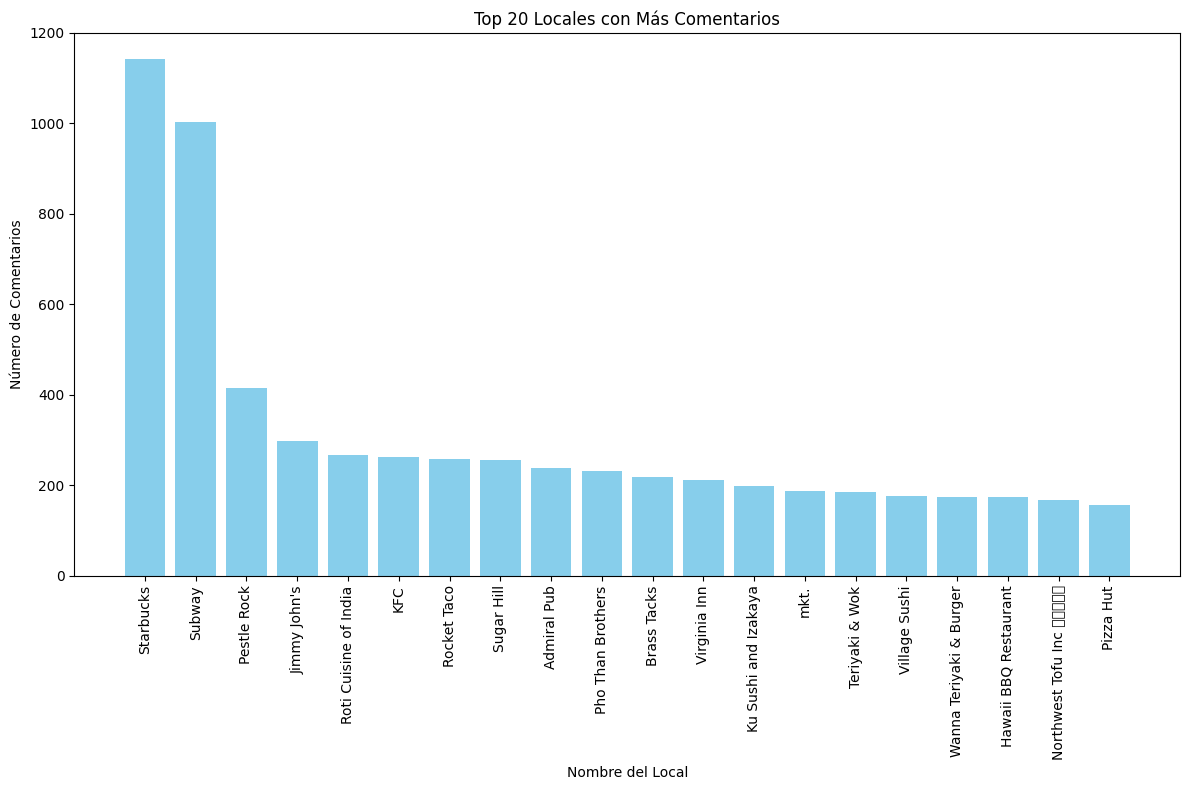

In [24]:
plt.figure(figsize=(12, 8))
plt.bar(top_locals['nombre_local'], top_locals['num_of_reviews'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Número de Comentarios')
plt.title('Top 20 Locales con Más Comentarios')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3105408125.py:16: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3105408125.py:16: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3105408125.py:16: UserWarning: Glyph 35910 (\N{CJK UNIFIED IDEOGRAPH-8C46}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3105408125.py:16: UserWarning: Glyph 33104 (\N{CJK UNIFIED IDEOGRAPH-8150}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Local\Temp\ipykernel_18292\3105408125.py:16: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  plt.tight_layout()
C:\Users\jessi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35199 (\N{CJK UNI

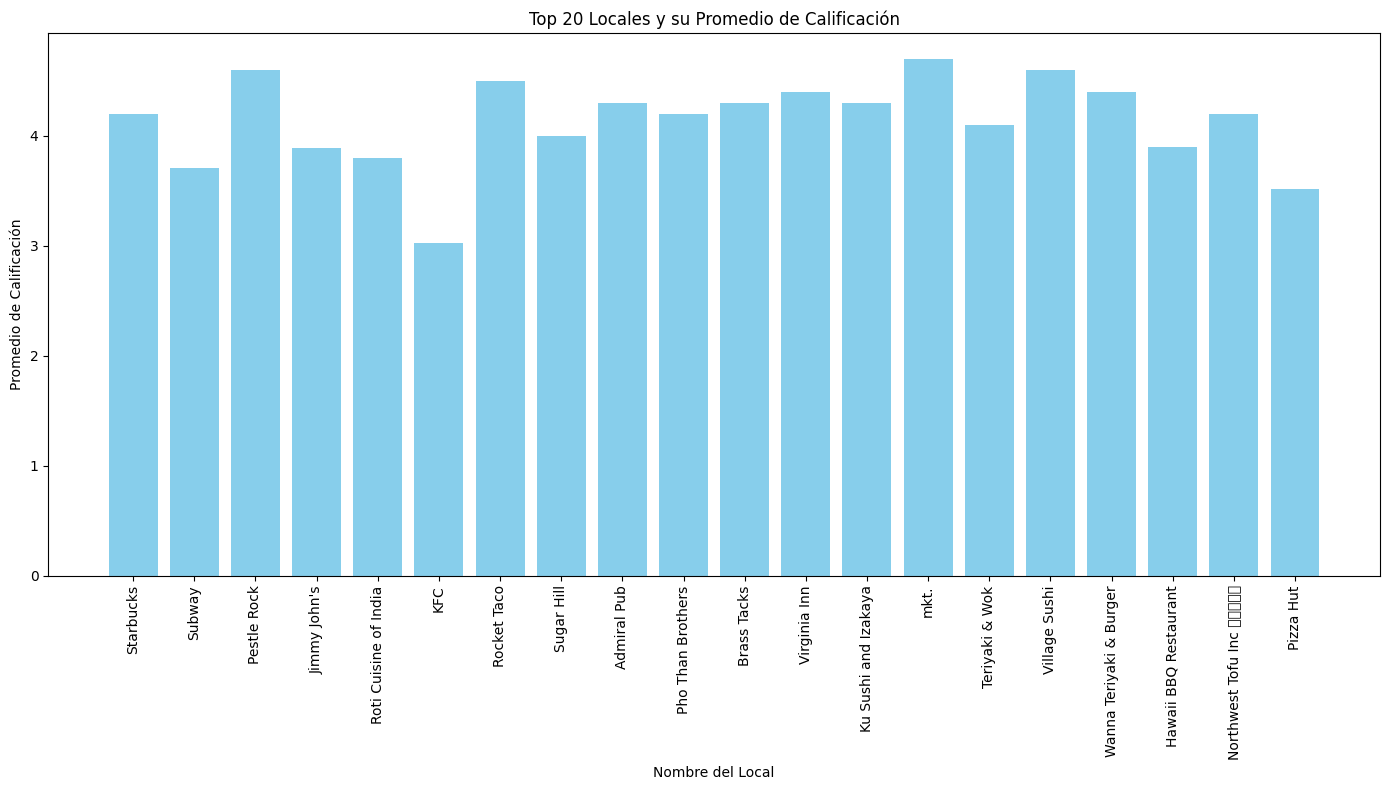

In [25]:
local_comment_counts = merged_df.groupby('nombre_local').agg(
    num_of_reviews=('nombre_local', 'count'),
    avg_rating=('avg_rating', 'mean')
).reset_index()

top_locals = local_comment_counts.sort_values(by='num_of_reviews', ascending=False).head(20)

plt.figure(figsize=(14, 8))
plt.bar(top_locals['nombre_local'], top_locals['avg_rating'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Promedio de Calificación')
plt.title('Top 20 Locales y su Promedio de Calificación')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()


In [26]:
merged_df.to_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Washington.csv", index=False)
